# Title: MBTI Personality Type Prediction 

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

### Data analysis

In [2]:
#loading the dataset
df=pd.read_csv('mbti_1.csv')

In [3]:
df

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...
...,...,...
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...
8671,ENFP,'So...if this thread already exists someplace ...
8672,INTP,'So many questions when i do these things. I ...
8673,INFP,'I am very conflicted right now when it comes ...


In [4]:
#dimension of the dataframe
df.shape

(8675, 2)

In [5]:
#Description of the dataframe
df.describe()

,type,posts
count,8675,8675
unique,16,8675
top,INFP,'Assholes: A Theory of Donald Trump Publisher...
freq,1832,1


In [6]:
#information on the data and datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


In [7]:
#checking for null values
df.isnull().sum()

type     0
posts    0
dtype: int64

In [8]:
#count of the mbti personality variants
df["type"].value_counts()

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64

Text(0, 0.5, 'Frequency of posts')

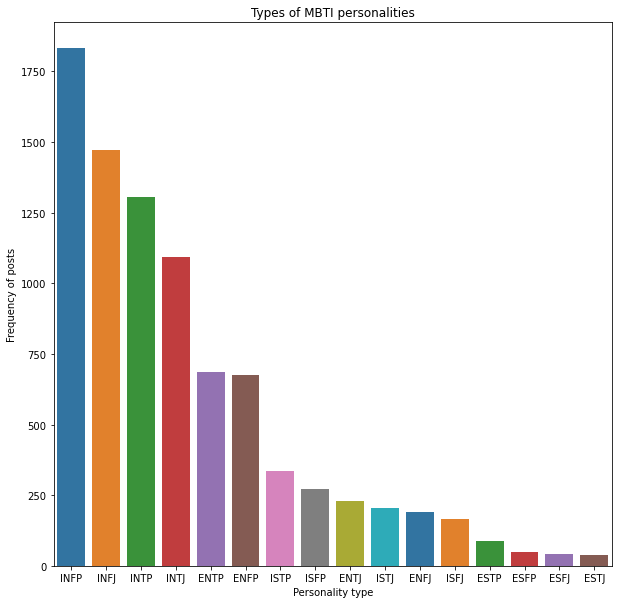

In [9]:
plt.figure(figsize=(10,10))
plt.title("Types of MBTI personalities")
sns.countplot(x=df["type"],palette="tab10",order=["INFP","INFJ","INTP","INTJ","ENTP","ENFP","ISTP","ISFP","ENTJ","ISTJ","ENFJ","ISFJ","ESTP","ESFP","ESFJ","ESTJ"])
plt.xlabel("Personality type")
plt.ylabel("Frequency of posts")

In [10]:
post_len=df["posts"].apply(len)

In [11]:
post_len

0       4652
1       7053
2       5265
3       6271
4       6111
        ... 
8670    5011
8671    7902
8672    5772
8673    9479
8674    7418
Name: posts, Length: 8675, dtype: int64

In [12]:
post_len.value_counts()

8112    9
7454    9
7576    8
7494    8
7897    7
       ..
7552    1
9607    1
5513    1
5529    1
4094    1
Name: posts, Length: 4447, dtype: int64

In [13]:
post_len.min()

57

In [14]:
post_len.max()

10090

Text(0, 0.5, 'Counts')

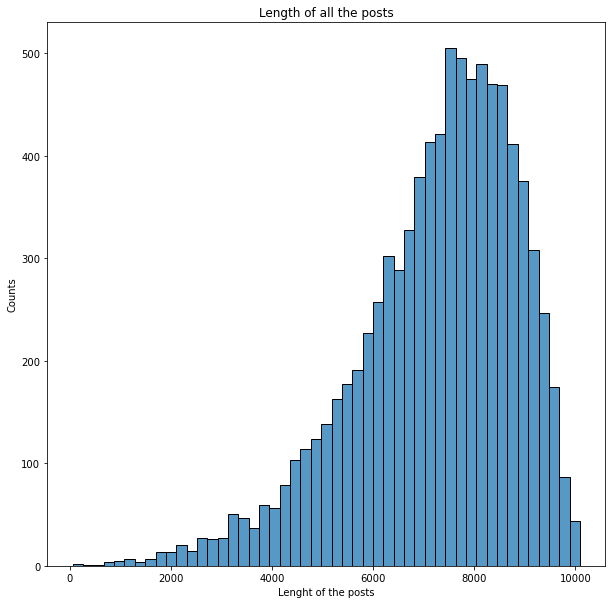

In [15]:
plt.figure(figsize=(10,10))
plt.title("Length of all the posts")
sns.histplot(post_len)
plt.xlabel("Lenght of the posts")
plt.ylabel("Counts")

In [16]:
"""scale_4 function to create a list for type indicators 
scale_4(ls,ch1,Type, ind)
where
    ch1 is either the scale like I or E in IE
                                N or S in NS
                                T or F in TF
                                J or P in JP
    ls is the scale
    Type is the column in df as in the MBTI personality variants
    ind is the index

"""
        
def scale_4(ls, ch1, Type, ind):
    i=0
    for row in Type:
        if row[ind]==ch1:
            ls[i]=1
        else :
            ls[i]=0
        i= i+1
    return ls


In [17]:
'''This function takes dataset as input 
   It adds 4 columns(dimnesions) for 4 type indicators(personality traits)'''
#function to add columns for 4 type indicators
def Add_Type_Indicators(df):
    IE = np.zeros(df.shape[0])
    NS = np.zeros(df.shape[0])
    TF = np.zeros(df.shape[0])
    JP = np.zeros(df.shape[0])
    
    Type= list(df["type"])
    
    IE= scale_4(IE, 'I', Type, 0)
    NS= scale_4(NS, 'N', Type, 1)
    TF= scale_4(TF, 'T', Type, 2)
    JP= scale_4(JP, 'J', Type, 3)
    
    df.insert(2, "IE", IE,True)
    df.insert(3, "NS", NS,True)
    df.insert(4, "TF", TF,True)
    df.insert(5, "JP", JP,True)
    
df_copy=df.copy()
Add_Type_Indicators(df_copy)

In [18]:
df_copy

,type,posts,IE,NS,TF,JP
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,1.0,1.0,0.0,1.0
1,ENTP,'I'm finding the lack of me in these posts ver...,0.0,1.0,1.0,0.0
2,INTP,'Good one _____ https://www.youtube.com/wat...,1.0,1.0,1.0,0.0
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",1.0,1.0,1.0,1.0
4,ENTJ,'You're fired.|||That's another silly misconce...,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...,1.0,0.0,0.0,0.0
8671,ENFP,'So...if this thread already exists someplace ...,0.0,1.0,0.0,0.0
8672,INTP,'So many questions when i do these things. I ...,1.0,1.0,1.0,0.0
8673,INFP,'I am very conflicted right now when it comes ...,1.0,1.0,0.0,0.0


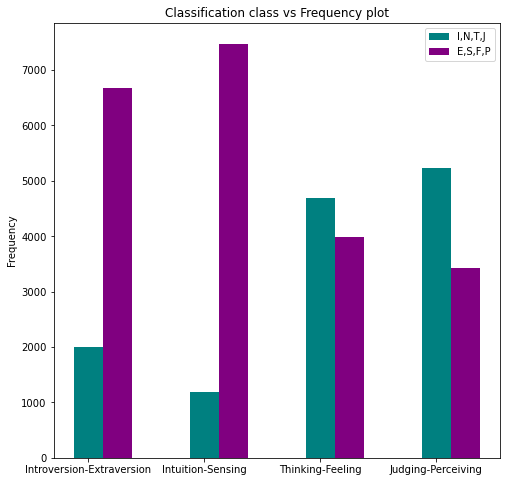

In [19]:
I,N,T,J=df_copy['IE'].value_counts()[0],df_copy['NS'].value_counts()[0],df_copy['TF'].value_counts()[0],df_copy['JP'].value_counts()[0]
E,S,F,P=df_copy['IE'].value_counts()[1],df_copy['NS'].value_counts()[1],df_copy['TF'].value_counts()[1],df_copy['JP'].value_counts()[1]

plt.figure(figsize=(8,8))

coordinates=np.array(range(0,4))*2
plt.bar(coordinates-0.25,(I,N,T,J),0.5,label="I,N,T,J",color='#008080',tick_label=['Introversion-Extraversion','Intuition-Sensing','Thinking-Feeling','Judging-Perceiving'])
plt.bar(coordinates+0.25,(E,S,F,P),0.5,label="E,S,F,P",color='#800080')

plt.legend()
plt.title('Classification class vs Frequency plot')
plt.ylabel('Frequency')
plt.show()

In [20]:
df_copy.corr()

,IE,NS,TF,JP
IE,1.000000,-0.045899,-0.069573,0.161939
NS,-0.045899,1.000000,-0.080954,0.014922
TF,-0.069573,-0.080954,1.000000,-0.004673
JP,0.161939,0.014922,-0.004673,1.000000


Correlation Matrix:
           IE        NS        TF        JP
IE  1.000000 -0.045899 -0.069573  0.161939
NS -0.045899  1.000000 -0.080954  0.014922
TF -0.069573 -0.080954  1.000000 -0.004673
JP  0.161939  0.014922 -0.004673  1.000000

HeatMap Visual:

AxesSubplot(0.125,0.125;0.62x0.755)


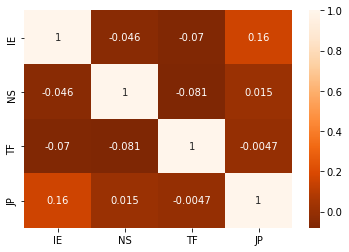

In [21]:
matrix=df_copy.corr()

print('Correlation Matrix:\n',matrix)
print('\nHeatMap Visual:\n')
print(sns.heatmap(matrix,annot=True,cmap='Oranges_r'))

### Pre-processing

In [22]:
df_copy

,type,posts,IE,NS,TF,JP
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,1.0,1.0,0.0,1.0
1,ENTP,'I'm finding the lack of me in these posts ver...,0.0,1.0,1.0,0.0
2,INTP,'Good one _____ https://www.youtube.com/wat...,1.0,1.0,1.0,0.0
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",1.0,1.0,1.0,1.0
4,ENTJ,'You're fired.|||That's another silly misconce...,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...,1.0,0.0,0.0,0.0
8671,ENFP,'So...if this thread already exists someplace ...,0.0,1.0,0.0,0.0
8672,INTP,'So many questions when i do these things. I ...,1.0,1.0,1.0,0.0
8673,INFP,'I am very conflicted right now when it comes ...,1.0,1.0,0.0,0.0


In [23]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kenny\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
# import a regular expression python libraries
import re

In [25]:
df_copy["posts"] = df_copy["posts"].str.lower()

In [26]:
#removing url links
for i in range(df_copy.shape[0]):
    post_temp=df_copy._get_value(i, 'posts')
    pattern = re.compile(r'https?://[a-zA-Z0-9./-]*/[a-zA-Z0-9?=_.]*[_0-9.a-zA-Z/-]*')
    post_temp= re.sub(pattern, ' ', post_temp)
    df_copy._set_value(i, 'posts',post_temp)
  
    pattern2=re.compile(r'https?://[a-zA-Z0-9./-]*')
    post_temp=df_copy._get_value(i, 'posts')
    post_temp= re.sub(pattern, ' ', post_temp)
    df_copy._set_value(i, 'posts',post_temp)

In [27]:
df_copy

,type,posts,IE,NS,TF,JP
0,INFJ,' ||| |||enfp and intj moments sportscente...,1.0,1.0,0.0,1.0
1,ENTP,'i'm finding the lack of me in these posts ver...,0.0,1.0,1.0,0.0
2,INTP,"'good one _____ |||of course, to which i s...",1.0,1.0,1.0,0.0
3,INTJ,"'dear intp, i enjoyed our conversation the o...",1.0,1.0,1.0,1.0
4,ENTJ,'you're fired.|||that's another silly misconce...,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...
8670,ISFP,' |||ixfp just because i always think of cats ...,1.0,0.0,0.0,0.0
8671,ENFP,'so...if this thread already exists someplace ...,0.0,1.0,0.0,0.0
8672,INTP,'so many questions when i do these things. i ...,1.0,1.0,1.0,0.0
8673,INFP,'i am very conflicted right now when it comes ...,1.0,1.0,0.0,0.0


In [28]:
#removing special characters and numbers from texts.
for i in range(df_copy.shape[0]):
    post_temp=df_copy._get_value(i, 'posts')
    pattern = re.compile(r'\W+')
    post_temp= re.sub(pattern, ' ', post_temp)
    pattern = re.compile(r'[0-9]')
    post_temp= re.sub(pattern, ' ', post_temp)
    pattern = re.compile(r'[_+]')
    post_temp= re.sub(pattern, ' ', post_temp)
    df_copy._set_value(i, 'posts',post_temp)

In [29]:
#removing extra spaces from texts.
for i in range(df_copy.shape[0]):
    post_temp=df_copy._get_value(i, 'posts')
    pattern = re.compile('\s+')
    post_temp= re.sub(pattern, ' ', post_temp)
    df_copy._set_value(i, 'posts', post_temp)

In [30]:
#remove stop words
remove_words = stopwords.words("english")
for i in range(df_copy.shape[0]):
    post_temp=df_copy._get_value(i, 'posts')
    post_temp=" ".join([w for w in post_temp.split(' ') if w not in remove_words])
    df_copy._set_value(i, 'posts', post_temp)

In [31]:
#remove mbti personality words from text
mbti_words =  ['infj', 'entp', 'intp', 'intj', 'entj', 'enfj', 'infp', 'enfp', 'isfp', 'istp', 'isfj', 'istj', 'estp', 'esfp', 'estj', 'esfj']
for i in range(df_copy.shape[0]):
    post_temp=df_copy._get_value(i, 'posts')
    post_temp=" ".join([w for w in post_temp.split(' ') if w not in mbti_words])
    df_copy._set_value(i, 'posts', post_temp)

In [32]:
#Lemmatization (grouping similar words)
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')
for i in range(df_copy.shape[0]):
    post_temp=df_copy._get_value(i, 'posts')
    post_temp=" ".join([lemmatizer.lemmatize(w) for w in post_temp.split(' ')])
    df_copy._set_value(i, 'posts', post_temp)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kenny\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [33]:
#data before preprocessing 
print("Data (post 1) before preprocessing :\n\n", df.iloc[1,1], "\n")
#data after preprocessing
print("Data (post 1) after preprocessing :\n\n", df_copy.iloc[1,1], "\n")

Data (post 1) before preprocessing :

 'I'm finding the lack of me in these posts very alarming.|||Sex can be boring if it's in the same position often. For example me and my girlfriend are currently in an environment where we have to creatively use cowgirl and missionary. There isn't enough...|||Giving new meaning to 'Game' theory.|||Hello *ENTP Grin*  That's all it takes. Than we converse and they do most of the flirting while I acknowledge their presence and return their words with smooth wordplay and more cheeky grins.|||This + Lack of Balance and Hand Eye Coordination.|||Real IQ test I score 127. Internet IQ tests are funny. I score 140s or higher.  Now, like the former responses of this thread I will mention that I don't believe in the IQ test. Before you banish...|||You know you're an ENTP when you vanish from a site for a year and a half, return, and find people are still commenting on your posts and liking your ideas/thoughts. You know you're an ENTP when you...|||http://img18

In [34]:
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer

In [35]:
def get_top_n_imp_words(corpus,full_corpus,n=10):
    
    vec = TfidfVectorizer().fit(full_corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

imp_words_dict = {}
for personality in tqdm(df['type'].unique()):
    personality_data = df[df['type'] == personality]
    imp_words = get_top_n_imp_words(personality_data['posts'],df_copy['posts'])
    imp_words_dict[personality] = imp_words

100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:58<00:00,  3.64s/it]


In [36]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [37]:
def show_type_properties(types):
    extracted_data=df_copy[df['type']==types]
    texts=" ".join(extracted_data['posts'].tolist())
    worldcount=WordCloud(background_color="white", max_words=200,stopwords=remove_words, contour_width=3)
    worldcount.generate(texts)
    #Plot
    plt.figure(figsize=[20,6])
    plt.subplot(121)
    plt.imshow(worldcount, interpolation='bilinear')
    plt.axis("off")
    plt.subplot(122)
    tuples = imp_words_dict[types]
    words = [x[0] for x in tuples]
    imp = [x[1] for x in tuples]
    sns.barplot(y = words,x = imp)
    plt.title(f'Important Words for {types}')
    plt.xlabel('Importance - tfidf value')

In [38]:
count=df.type.value_counts()

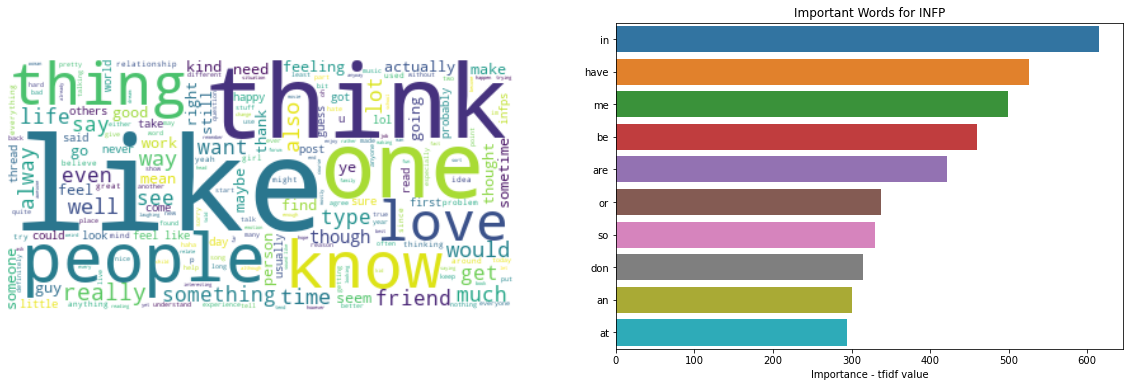

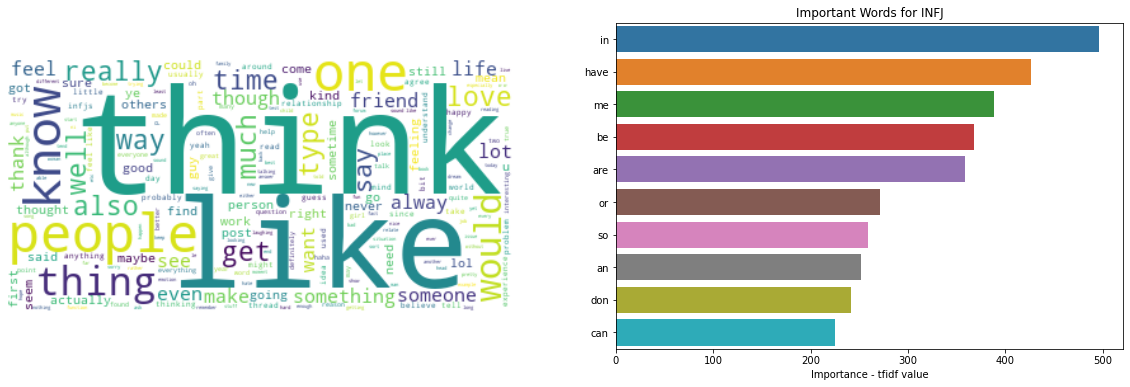

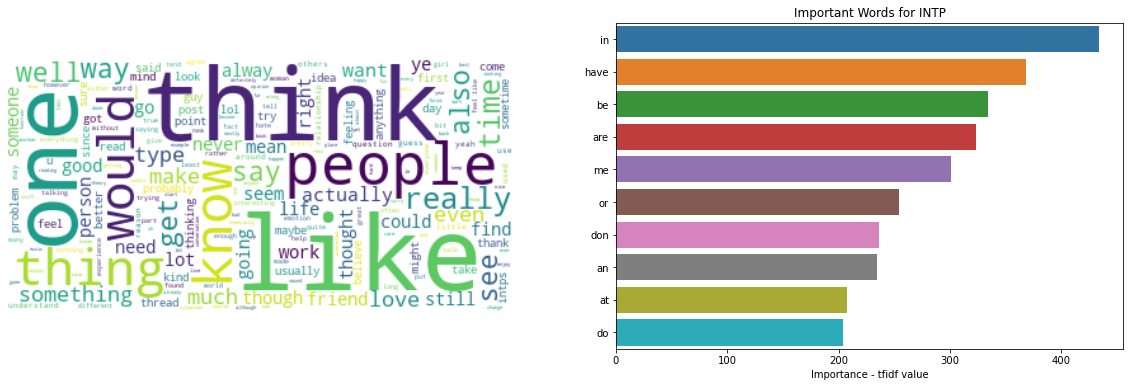

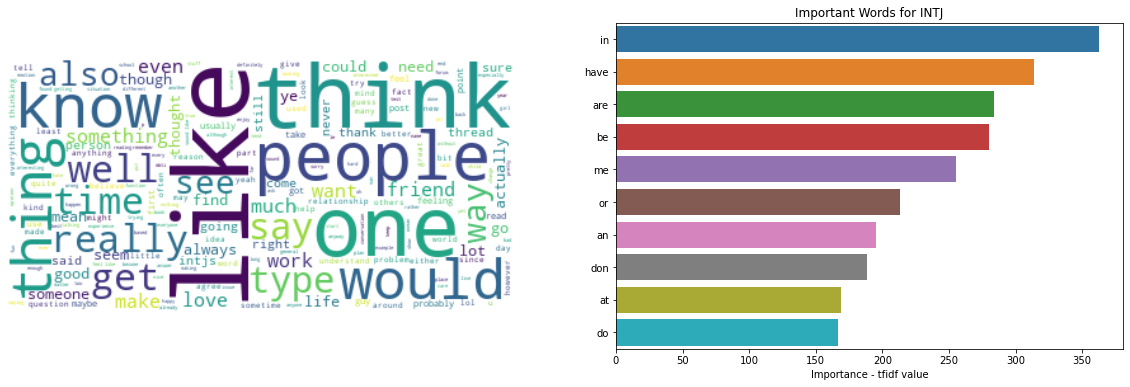

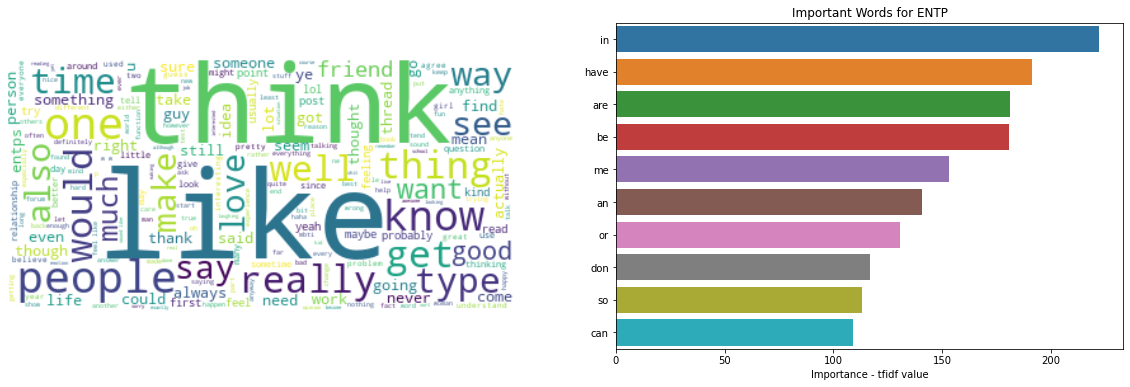

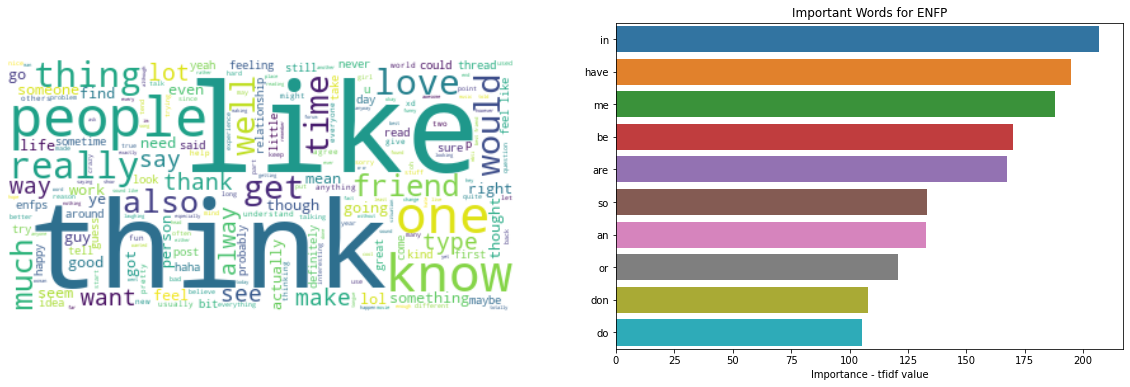

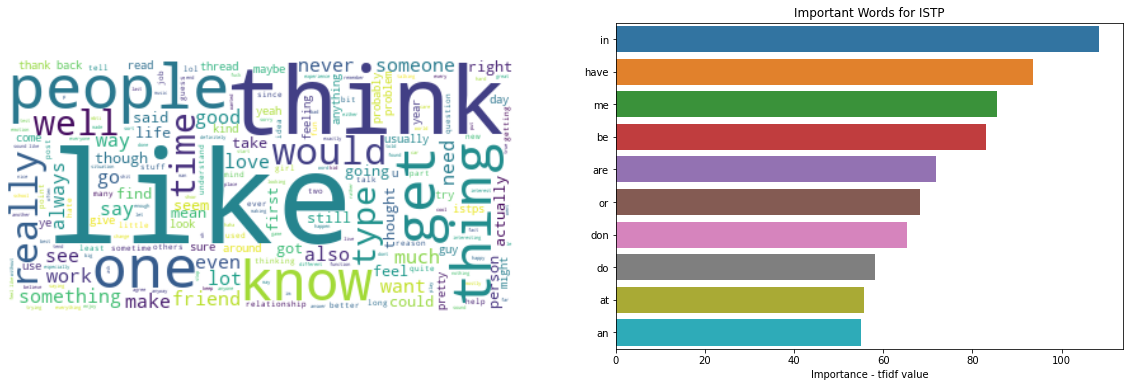

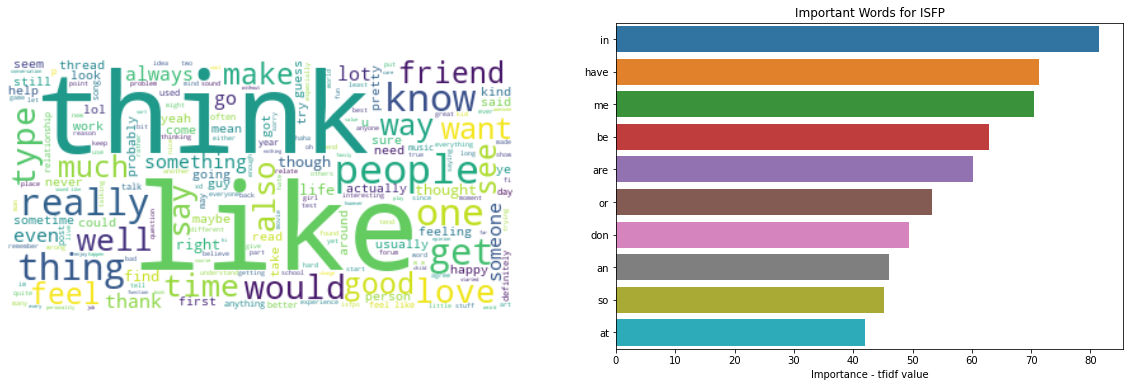

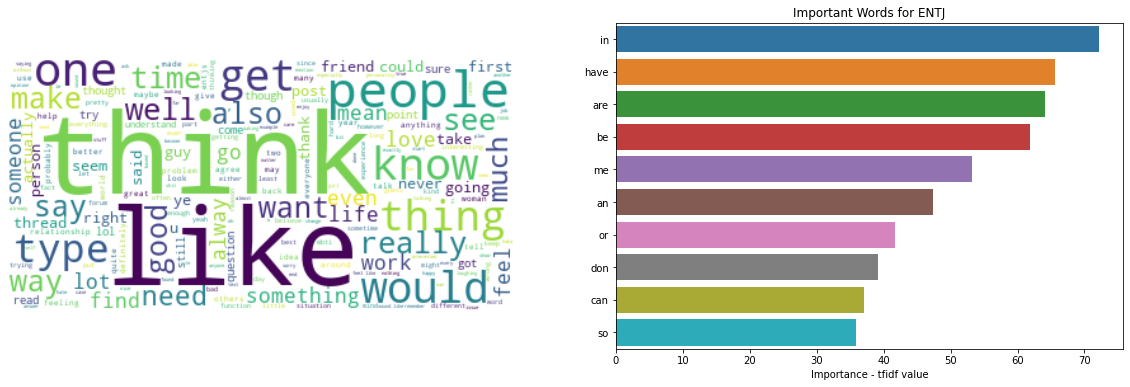

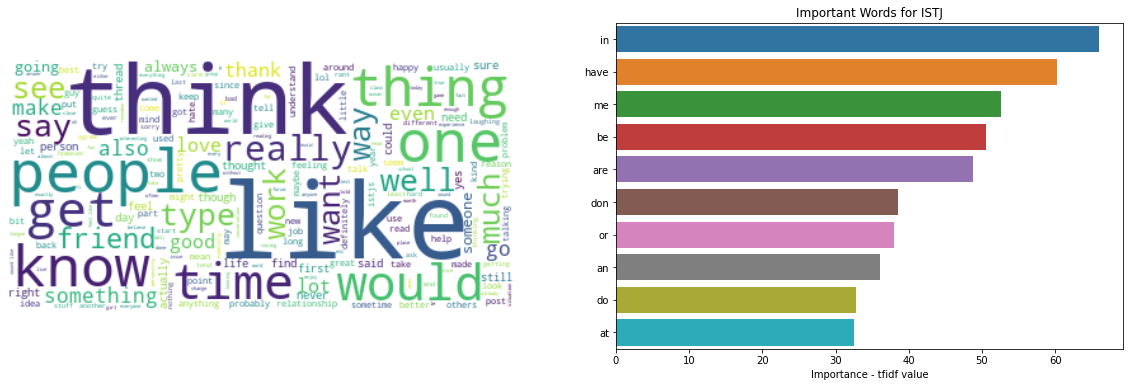

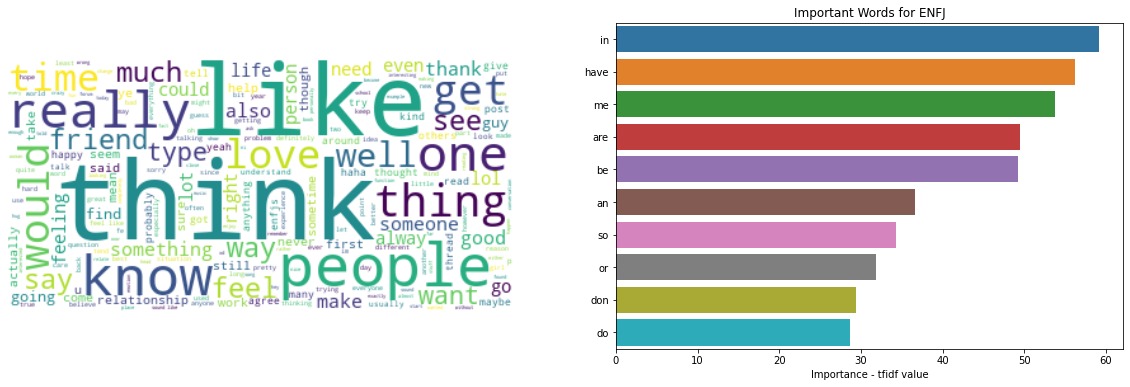

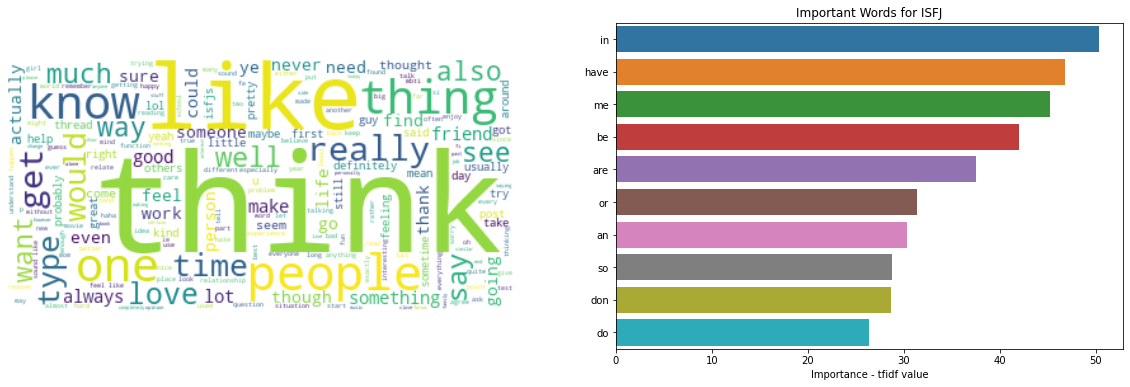

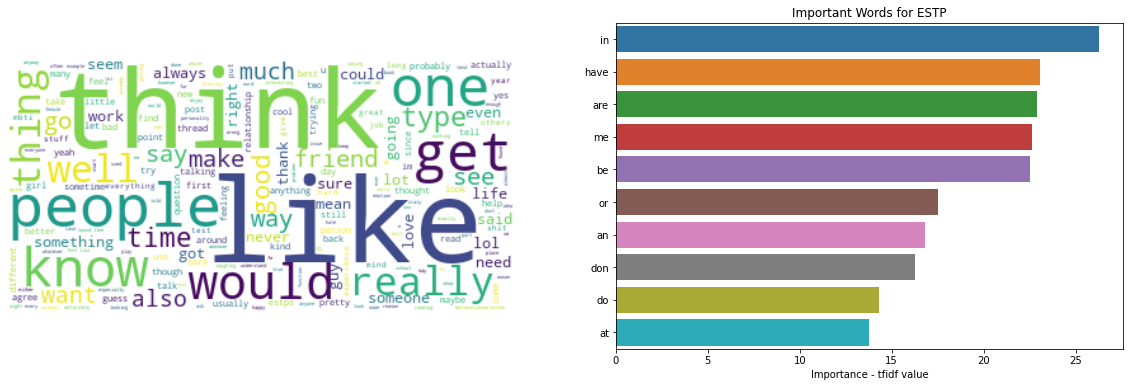

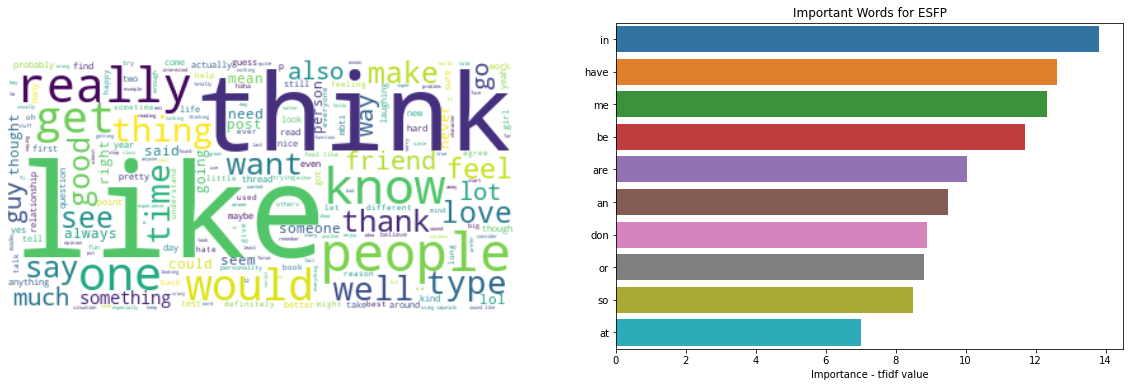

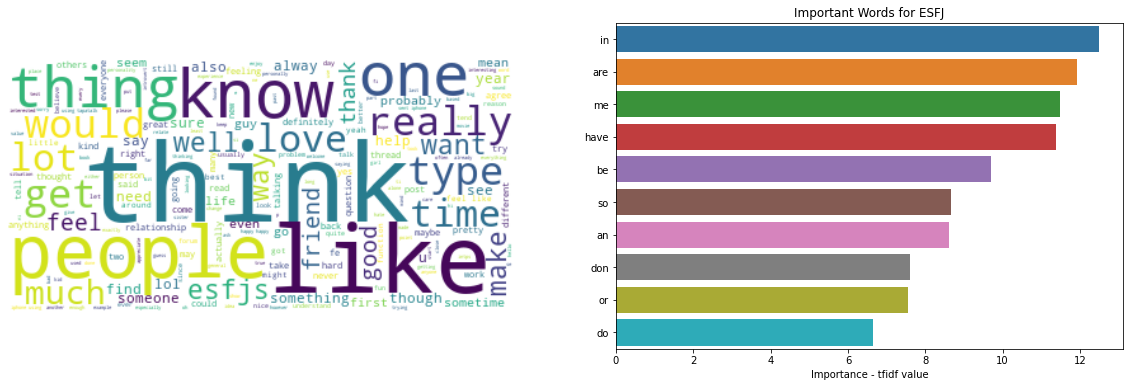

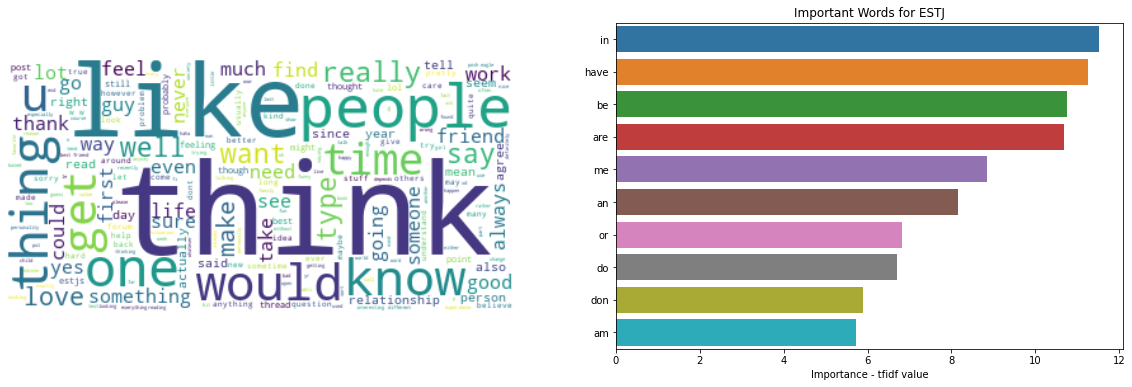

In [39]:
for i in count.index:
    show_type_properties(i)

In [40]:
del df_copy['type']

### Feature selection

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [42]:
#Finding features using CountVectorizer by converting the posts into matrix of word count
post_list=[]
for i,j in df_copy.posts.iteritems():
    post_list.append(j)

vector=CountVectorizer(stop_words='english',max_features=1500)
features=vector.fit_transform(post_list)

#tf-idf to weigh the importance of words(features) across all posts and select more relevent features
transform = TfidfTransformer()
finalfeatures =  transform.fit_transform(features).toarray()

In [43]:
a=pd.DataFrame({"post_list":post_list})

In [44]:
a

,post_list
0,moment sportscenter top ten play prank life c...
1,finding lack post alarming sex boring positio...
2,good one course say know blessing curse absol...
3,dear enjoyed conversation day esoteric gabbin...
4,fired another silly misconception approaching...
...,...
8670,ixfp always think cat fi doms reason especial...
8671,thread already exists someplace else post hec...
8672,many question thing would take purple pill pi...
8673,conflicted right come wanting child honestly ...


In [45]:
a.to_csv("post.csv",index=False)

In [46]:
ffdf=pd.DataFrame(finalfeatures)

In [47]:
ffdf

,0,1,2,3,4,5,6,7,8,9,...,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.036232,0.089009,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.035741,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.023370,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.124021,0.044966,0.000000,0.108218,0.0,0.0,0.000000,0.0,0.064894,0.0,...,0.000000,0.147011,0.000000,0.061125,0.0,0.000000,0.000000,0.000000,0.082865,0.000000
3,0.000000,0.073199,0.067915,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.030053,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.027606,0.000000,0.057390,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8670,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.059503,0.069558,0.000000,0.084576
8671,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.051111,0.0,0.000000,0.0,...,0.051557,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
8672,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.104983,0.000000,0.054563,0.0,0.000000,0.000000,0.000000,0.073969,0.000000
8673,0.000000,0.057159,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.070403,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


In [48]:
print(finalfeatures.shape)

(8675, 1500)


### Splitting the data

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_data=finalfeatures
Y_data= df_copy.iloc[:,1:5]

In [51]:
Y_data

,IE,NS,TF,JP
0,1.0,1.0,0.0,1.0
1,0.0,1.0,1.0,0.0
2,1.0,1.0,1.0,0.0
3,1.0,1.0,1.0,1.0
4,0.0,1.0,1.0,1.0
...,...,...,...,...
8670,1.0,0.0,0.0,0.0
8671,0.0,1.0,0.0,0.0
8672,1.0,1.0,1.0,0.0
8673,1.0,1.0,0.0,0.0


In [52]:
X_train_IE, X_test_IE, Y_train_IE, Y_test_IE = train_test_split(X_data, Y_data['IE'], test_size=0.2, random_state=123,stratify=Y_data)
X_train_NS, X_test_NS, Y_train_NS, Y_test_NS = train_test_split(X_data, Y_data['NS'], test_size=0.2, random_state=123,stratify=Y_data)
X_train_TF, X_test_TF, Y_train_TF, Y_test_TF = train_test_split(X_data, Y_data['TF'], test_size=0.2, random_state=123,stratify=Y_data)
X_train_JP, X_test_JP, Y_train_JP, Y_test_JP = train_test_split(X_data, Y_data['JP'], test_size=0.2, random_state=123,stratify=Y_data)


### Model building

In [53]:
#Function to predict labels for X_test of the given model
'''This function takes 4 GridSearchCV model as input.
  It fits all 4 models with thier respective training data.
  It finds the best estimator of GridSearchCV and uses 
  it to return predicted values of 4 test sets'''
def predict(model1, model2, model3, model4):
    #IE prediction
    ypredIE=model1.fit(X_train_IE,Y_train_IE).best_estimator_.predict(X_test_IE)
    #NS prediction
    ypredNS=model2.fit(X_train_NS,Y_train_NS).best_estimator_.predict(X_test_NS)
    #TF prediction
    ypredTF=model3.fit(X_train_TF,Y_train_TF).best_estimator_.predict(X_test_TF)
    #JP prediction
    ypredJP=model4.fit(X_train_JP,Y_train_JP).best_estimator_.predict(X_test_JP)
    return ypredIE, ypredNS, ypredTF, ypredJP


#Function to print Classification Report of the given model
'''This function takes 4 predicted output datasets as input.
   It computes classfication report: accuracy, recall, f1-score.
   It prints classification reports for all 4 predictions (models). '''
def print_classification_report(ypredIE, ypredNS, ypredTF, ypredJP):
    #Classification Report for Introversion(I) / Extroversion(E)
    print("Classification Report for Introversion(I) / Extroversion(E): \n ")
    print(classification_report(Y_test_IE, ypredIE))
    accuracyIE=accuracy_score(Y_test_IE,ypredIE)
    print("Accuracy for Introversion(I) / Extroversion(E): ",accuracyIE, "\n")
    print("\n")

    #Classification Report for Intuition(N) / Sensing(S)
    print("Classification Report for Intuition(N) / Sensing(S): \n ")
    print(classification_report(Y_test_NS, ypredNS))
    accuracyNS=accuracy_score(Y_test_NS,ypredNS)
    print("Accuracy for Intuition(N) / Sensing(S): ", accuracyNS, "\n")
    print("\n")

    #Classification Report for Thinking(T) / Feeling(F)
    print("Classification Report for Thinking(T) / Feeling(F): \n ")
    print(classification_report(Y_test_TF, ypredTF))
    accuracyTF=accuracy_score(Y_test_TF,ypredTF)
    print("Accuracy for Thinking(T) / Feeling(F): ", accuracyTF, "\n")
    print("\n")

    #Classification Report for Judging(J) / Perceiving(P)
    print("Classification Report for Judging(J) / Perceiving(P): \n ")
    print(classification_report(Y_test_JP, ypredJP))
    accuracyJP=accuracy_score(Y_test_JP,ypredJP)
    print("Accuracy for Judging(J) / Perceiving(P): ",accuracyJP, "\n")
    print("\n")


#Function to print Confusion matrix for the given model
'''This function takes 4 predicted output datasets as input.
   It computes confusion matrix.
   It prints confusion matrix for all 4 predictions (models). '''
def print_confusion_matrix(ypredIE, ypredNS, ypredTF, ypredJP):
    #Confusion matrix for Introversion(I) / Extroversion(E):
    plt.figure()
    cm = metrics.confusion_matrix(Y_test_IE, ypredIE)
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, cmap = 'Blues_r');
    plt.ylabel('Y_test_IE');
    plt.xlabel('ypredIE');
    plt.title("Confusion matrix for Introversion(I) / Extroversion(E): ", size = 17);
    plt.show()

    #Confusion matrix for Intuition(N) / Sensing(S):
    plt.figure()
    cm = metrics.confusion_matrix(Y_test_NS, ypredNS)
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, cmap = 'Greens_r');
    plt.ylabel('Y_test_NS');
    plt.xlabel('ypredNS');
    plt.title("Confusion matrix for Intuition(N) / Sensing(S): ", size = 17);
    plt.show()

    #Confusion matrix for Judging(J) / Perceiving(P): 
    plt.figure()
    cm = metrics.confusion_matrix(Y_test_TF, ypredTF)
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, cmap = 'Reds_r');
    plt.ylabel('Y_test_TF');
    plt.xlabel('ypredTF');
    plt.title("Confusion matrix for Thinking(T) / Feeling(F): ", size = 17);
    plt.show()
    
    #Confusion matrix for Judging(J) / Perceiving(P):
    plt.figure()
    cm = metrics.confusion_matrix(Y_test_JP, ypredJP)
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, cmap = 'Purples_r');
    plt.ylabel('Y_test_JP');
    plt.xlabel('ypredJP');
    plt.title("Confusion matrix for Judging(J) / Perceiving(P): ", size = 17);
    plt.show()


#Function to print roc_auc_curve for the given model
'''This function takes 4 predicted probabilitie datasets as input.
   It plots ROC Curve for all 4 predictions (models). '''
def print_roc_auc_curve(probIE, probNS, probTF, probJP):
    
    fp_IE, tp_IE, val = roc_curve(Y_test_IE, probIE[:,1])
    fp_NS, tp_NS, val = roc_curve(Y_test_NS, probNS[:,1])
    fp_TF, tp_TF, val = roc_curve(Y_test_TF, probTF[:,1])
    fp_JP, tp_JP, val = roc_curve(Y_test_JP, probJP[:,1])

    plt.figure()
    plt.plot(fp_IE, tp_IE, linestyle='--', color='red', label='Introversion(I) / Extroversion(E)')
    plt.plot(fp_NS, tp_NS, linestyle='--', color='blue', label='Intuition(N) / Sensing(S)')
    plt.plot(fp_TF, tp_TF, linestyle='--', color='pink', label='Thinking(T) / Feeling(F)')
    plt.plot(fp_JP, tp_JP, linestyle='--', color='green', label='Judging(J) / Perceiving(P)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='best')
    plt.show()


### Logistic Regression model

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [55]:
#Metrics
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [56]:
log =LogisticRegression(max_iter=500)
#Apply stratified cross validation
grid1= GridSearchCV(log,{},cv=5)
grid2= GridSearchCV(log,{},cv=5)
grid3= GridSearchCV(log,{},cv=5)
grid4= GridSearchCV(log,{},cv=5)
#prediction
ypredIE, ypredNS, ypredTF, ypredJP= predict(grid1, grid2, grid3, grid4)
#Print classificatio report for all four dimensions
print_classification_report(ypredIE, ypredNS, ypredTF, ypredJP)

Classification Report for Introversion(I) / Extroversion(E): 
 
              precision    recall  f1-score   support

         0.0       0.76      0.27      0.40       401
         1.0       0.82      0.98      0.89      1334

    accuracy                           0.81      1735
   macro avg       0.79      0.62      0.64      1735
weighted avg       0.80      0.81      0.77      1735

Accuracy for Introversion(I) / Extroversion(E):  0.8115273775216139 



Classification Report for Intuition(N) / Sensing(S): 
 
              precision    recall  f1-score   support

         0.0       0.78      0.06      0.11       240
         1.0       0.87      1.00      0.93      1495

    accuracy                           0.87      1735
   macro avg       0.82      0.53      0.52      1735
weighted avg       0.86      0.87      0.81      1735

Accuracy for Intuition(N) / Sensing(S):  0.8674351585014409 



Classification Report for Thinking(T) / Feeling(F): 
 
              precision    recall  

<Figure size 432x288 with 0 Axes>

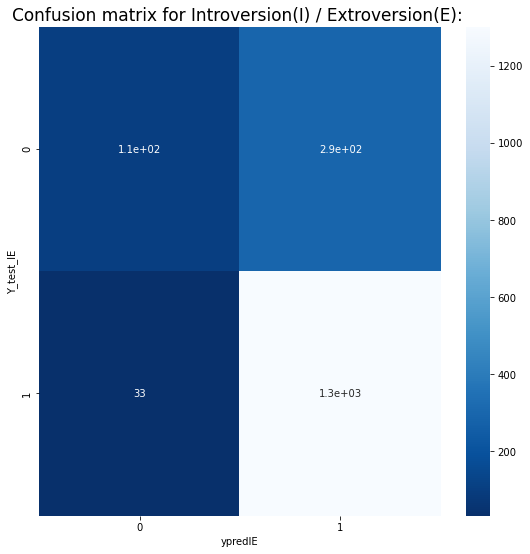

<Figure size 432x288 with 0 Axes>

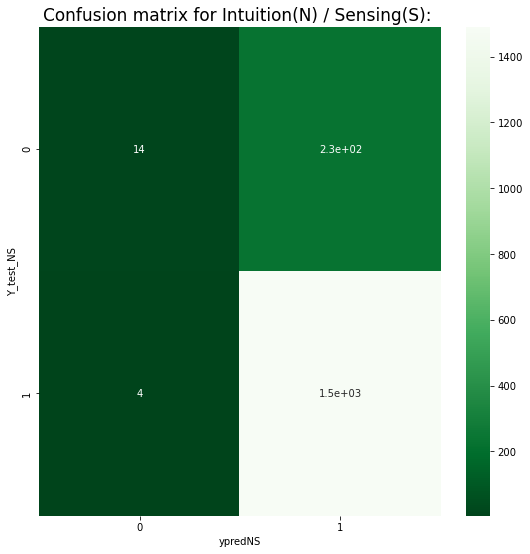

<Figure size 432x288 with 0 Axes>

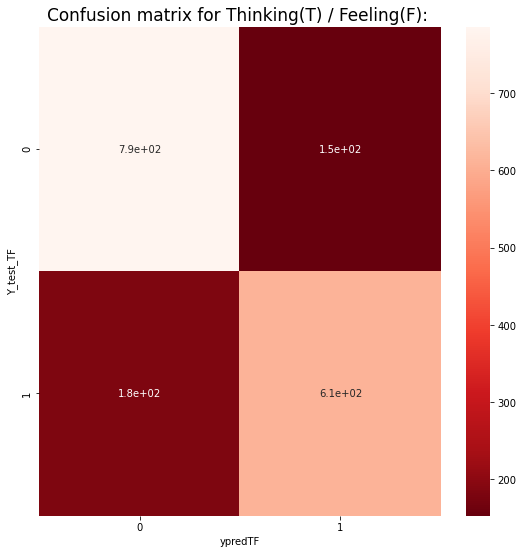

<Figure size 432x288 with 0 Axes>

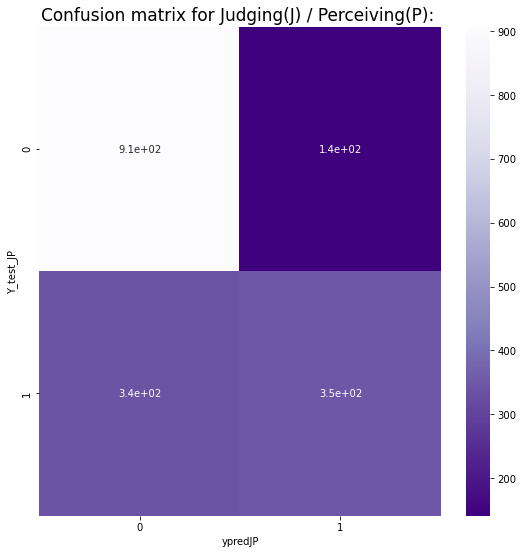

In [57]:
#Plot confusion matix for all four dimensions
print_confusion_matrix(ypredIE, ypredNS, ypredTF, ypredJP)

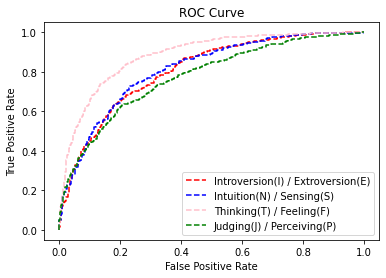

In [58]:
#Plot ROC curve
print_roc_auc_curve(grid1.best_estimator_.predict_proba(X_test_IE), grid2.best_estimator_.predict_proba(X_test_NS),
                    grid3.best_estimator_.predict_proba(X_test_TF),grid4.best_estimator_.predict_proba(X_test_JP))

### Support Vector Classification

In [59]:
from sklearn.svm import SVC

Classification Report for Introversion(I) / Extroversion(E): 
 
              precision    recall  f1-score   support

         0.0       0.77      0.21      0.33       401
         1.0       0.80      0.98      0.88      1334

    accuracy                           0.80      1735
   macro avg       0.79      0.59      0.61      1735
weighted avg       0.80      0.80      0.76      1735

Accuracy for Introversion(I) / Extroversion(E):  0.8023054755043227 



Classification Report for Intuition(N) / Sensing(S): 
 
              precision    recall  f1-score   support

         0.0       0.79      0.05      0.09       240
         1.0       0.87      1.00      0.93      1495

    accuracy                           0.87      1735
   macro avg       0.83      0.52      0.51      1735
weighted avg       0.86      0.87      0.81      1735

Accuracy for Intuition(N) / Sensing(S):  0.8662824207492795 



Classification Report for Thinking(T) / Feeling(F): 
 
              precision    recall  

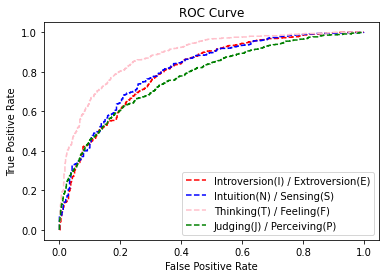

In [60]:
#IE prediction
svm1=SVC(random_state=123, probability=True)
svm1.fit(X_train_IE,Y_train_IE)
ypredIE=svm1.predict(X_test_IE)

#NS prediction
svm2=SVC(random_state=123, probability=True)
svm2.fit(X_train_NS,Y_train_NS)
ypredNS=svm2.predict(X_test_NS)

#TF prediction
svm3=SVC(random_state=123, probability=True)
svm3.fit(X_train_TF,Y_train_TF)
ypredTF=svm3.predict(X_test_TF)

#JP prediction
svm4=SVC(random_state=123, probability=True)
svm4.fit(X_train_JP,Y_train_JP)
ypredJP=svm4.predict(X_test_JP)

#Print classificatio report for all four axis
print_classification_report(ypredIE, ypredNS, ypredTF, ypredJP)

#plot ROC curve
print_roc_auc_curve(svm1.predict_proba(X_test_IE), svm2.predict_proba(X_test_NS),
                    svm3.predict_proba(X_test_TF), svm4.predict_proba(X_test_JP))

#### Model 1 for I or E

In [61]:
model_1=LogisticRegression()
model_1.fit(X_train_IE,Y_train_IE)

LogisticRegression()

In [62]:
prediction_1=model_1.predict(X_test_IE)

In [63]:
accuracy_score(Y_test_IE,prediction_1)

0.8115273775216139

In [64]:
sample_test = ["i love to talk"]
vect = vector.transform(sample_test).toarray()
model_1.predict(vect)

array([0.])

In [65]:
if model_1.predict(vect) == 1:
    a="I"
    print("Introversion")
else:
    a="E"
    print("Extraversion")

Extraversion


#### Model 2 for N or S

In [66]:
model_2=LogisticRegression()
model_2.fit(X_train_NS,Y_train_NS)

LogisticRegression()

In [67]:
prediction_2=model_2.predict(X_test_NS)

In [68]:
accuracy_score(Y_test_NS,prediction_2)

0.8674351585014409

In [69]:
sample_test = ["I love feeling affectionate for the one I love and care for"]
vect = vector.transform(sample_test).toarray()
model_2.predict(vect)

array([1.])

In [70]:
if model_2.predict(vect) == 1:
    b="N"
    print("Intuition")
else:
    b="S"
    print("Sensing")

Intuition


#### Model 3 for T or F

In [71]:
model_3 = LogisticRegression()
model_3.fit(X_train_TF,Y_train_TF)

LogisticRegression()

In [72]:
prediction_3=model_3.predict(X_test_TF)

In [73]:
accuracy_score(Y_test_TF,prediction_3)

0.805763688760807

In [74]:
sample_test = ["Everyone will laugh at me"]
vect = vector.transform(sample_test).toarray()
model_3.predict(vect)

array([1.])

In [75]:
if model_3.predict(vect) == 1:
    c="T"
    print("Thinking")
else:
    c="F"
    print("Feeling")

Thinking


#### Model 4 for J or P

In [76]:
model_4 = LogisticRegression()
model_4.fit(X_train_JP,Y_train_JP)

LogisticRegression()

In [77]:
prediction_4=model_4.predict(X_test_JP)

In [78]:
accuracy_score(Y_test_JP,prediction_4)

0.7221902017291066

In [79]:
sample_test = ["i like to have things decided."]
vect = vector.transform(sample_test).toarray()
model_4.predict(vect)

array([0.])

In [80]:
if model_4.predict(vect) == 1:
    d="J"
    print("Judging")
else:
    d="P"
    print("Perceiving")

Perceiving


In [81]:
# printing the personality type
print(a,b,c,d)

E N T P


In [82]:
sample_test = ["i love to talk I love feeling affectionate for the one I love and care for Everyone will laugh at me i like to have things decided."]

I am crazy dude.I enjoy going out a lot. I like to party but sometimes i feel like its very tiring.

In [83]:
a=input("Describe yourself in few words:")

Describe yourself in few words:I am crazy dude.I enjoy going out a lot. I like to party but sometimes i feel like its very tiring.


In [84]:
sample_test=[a]

In [85]:
model_1=LogisticRegression()
model_1.fit(X_train_IE,Y_train_IE)
prediction_1=model_1.predict(X_test_IE)
accuracy_score(Y_test_IE,prediction_1)

vect = vector.transform(sample_test).toarray()
model_1.predict(vect)
if model_1.predict(vect) == 1:
    a="I"
    print("Introversion")
else:
    a="E"
    print("Extraversion")
    
    
model_2=LogisticRegression()
model_2.fit(X_train_NS,Y_train_NS)
prediction_2=model_2.predict(X_test_NS)
accuracy_score(Y_test_NS,prediction_2)

vect = vector.transform(sample_test).toarray()
model_2.predict(vect)
if model_2.predict(vect) == 1:
    b="N"
    print("Intuition")
else:
    b="S"
    print("Sensing")


model_3 = LogisticRegression()
model_3.fit(X_train_TF,Y_train_TF)
prediction_3=model_3.predict(X_test_TF)
accuracy_score(Y_test_TF,prediction_3)

vect = vector.transform(sample_test).toarray()
model_3.predict(vect)
if model_3.predict(vect) == 1:
    c="T"
    print("Thinking")
else:
    c="F"
    print("Feeling")
    
    
model_4 = LogisticRegression()
model_4.fit(X_train_JP,Y_train_JP)
prediction_4=model_4.predict(X_test_JP)
accuracy_score(Y_test_JP,prediction_4)

vect = vector.transform(sample_test).toarray()
model_4.predict(vect)
if model_4.predict(vect) == 1:
    d="J"
    print("Judging")
else:
    d="P"
    print("Perceiving")
    
print(a,b,c,d)

Extraversion
Intuition
Feeling
Perceiving
E N F P


# Saving the trained models

In [86]:
import pickle

In [87]:
filename="trained_model_1.sav"
pickle.dump(model_1,open(filename,"wb"))

In [88]:
filename_2="trained_model_2.sav"
pickle.dump(model_2,open(filename_2,"wb"))

In [89]:
filename_3="trained_model_3.sav"
pickle.dump(model_3,open(filename_3,"wb"))

In [90]:
filename_4="trained_model_4.sav"
pickle.dump(model_4,open(filename_4,"wb"))